### This notebook replicates the plots from Section 6 of the paper *Algebraic and Statistical Properties of the Partially Regularized Ordinary Least Squares Interpolator*.

Import the packages and follow the steps below to replicate the plots as shown in the paper:

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. Specify an experiment and the x-axis label

Ensure that you have successfully run the script *simu.sh* and that there are several `.csv` files under the folder `results/fix_p/`, for example, if you are running a fixed `p` with varying `n` experiment.

In [4]:
experi_type = 'fix_p'           #'fix_p', 'fix_ratio', 'fix_ratio_increasing_noise', 'fix_ratio_increasing_int'
xlabel = 'intercept magnitude'  #'smaple size', 'covariate size', 'noise std magnitude', 'intercept magnitude'
basic_dir = 'path-to-your\\result\\'

### 2. Specify the estimators and covariate types
Specify the covariate types using `covar_type_list`, and define the estimators you want to compare by setting the variable `ve_types`.

#### Note: 
By default, there are three generative models for the covariate matrix, and four variance estimators are compared.


In [5]:
covar_type_list = ['standnorm', 'spike', 'geometric']
ve_types = [ 'partial_j', 'partial_jc', 'full_LOO', 'partial_LOO']

### 3. Adjust the y-axis limit by setting an appropriate bound.

#### Note:
You can set `bound=None` if you're unsure of a suitable value.


In [6]:
bound = 5 #1.8, 1, 60, 5

### 4. Set the variance vector
Define the true variance vector, which will be subtracted when deriving the bias.

#### Note:
By default, for experiments other than the fixed `(n, p)` ratio with increasing noise variance, we set `noise_var_list=[1,1,1,1,1]`. For the fixed `(n, p)` ratio with increasing noise variance experiment, we use `noise_var_list=[1,4,25,49,100]`.


In [7]:
noise_var_list = [1,1,1,1,1] #[1,4,25,49,100]

### 5. Run the following block to load the necessary functions
Execute the code block below to prepare the required functions for generating the plots.


In [9]:
def get_covar_name(covar_type):
    # Function for generating the caption of the plot
    
    if covar_type =='standnorm':
        covar_name = 'standard normal model'
    
    elif covar_type == 'spike':
        covar_name = 'spiked model'
    
    else:
        covar_name = 'geometric model'
        
    return covar_name

def get_experi_name(experi_type):
    # Function for generating the caption of the plot
    
    if experi_type == 'fix_p':
        experi_name = 'fixed p with increasing n'
        
    elif experi_type == 'fix_ratio':
        experi_name = 'fixed (n,p) ratio with incresing dimensions'
        
    elif experi_type == 'fix_ratio_increasing_noise':
        experi_name = 'fixed (n,p) with incresing noise'
        
    else:
        experi_name = 'fixed (n,p) with incresing intercept'
        
    return experi_name

def draw_plot(bound, xlabel, noise_var_list):
    # Function for drawing the sub-plots of an experiment
    
    # adjust the shade color
    alpha_0 = [0.15, 0.4, 0.2, 0.35]
    colors = ['green', 'lightcoral', 'deepskyblue', 'orange']
    
    data_list = [data1, data2, data3, data4]
    plt.figure(dpi=150, figsize=(4, 3))
    
    for i, data in enumerate(data_list):
        bias = np.mean(data, axis=0) - noise_var_list
        std = np.std(data, axis=0)

        plt.plot(data.columns, bias, label=ve_types[i], color=colors[i])
        plt.fill_between(data.columns, bias - std, bias + std, color=colors[i], alpha=alpha_0[i])

    bd = bound
    plt.xlabel(xlabel,fontsize=8)
    plt.ylabel('Bias ($\widehat{\sigma}^2 - \sigma^2$)', fontsize=8)
    
    if bd == None :
        zoom = ''
        plt.legend(loc='upper left',fontsize=8)
        
    else:
        plt.ylim([-bd,bd])
        zoom = '(zoomed in)'
        
    plt.title(f'{get_experi_name(experi_type)}: \n {get_covar_name(covar_type)} {zoom}', fontsize=9)   
    plt.grid(True, alpha=0.3)

    save_path = os.path.join(basic_dir, 'images',f'vedf_{experi_type}_{covar_type}{zoom}.png')
    plt.savefig(save_path,bbox_inches='tight')
#     plt.show()

### 6. Run the following block to generate the plots
After running the code block below, the `.png` files will be saved in the same folder as the `.csv` results. You will also be able to view the plots in the output of this block.


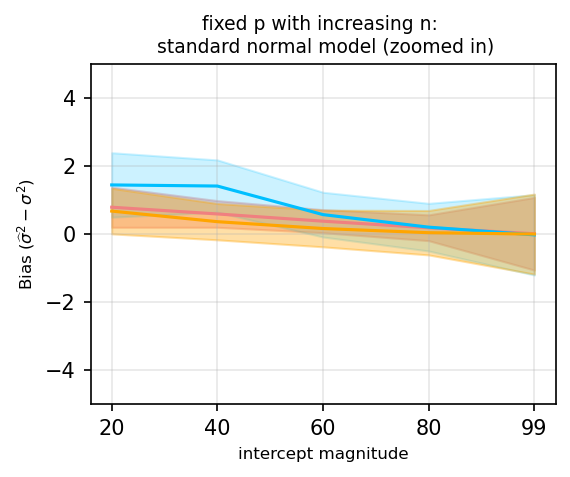

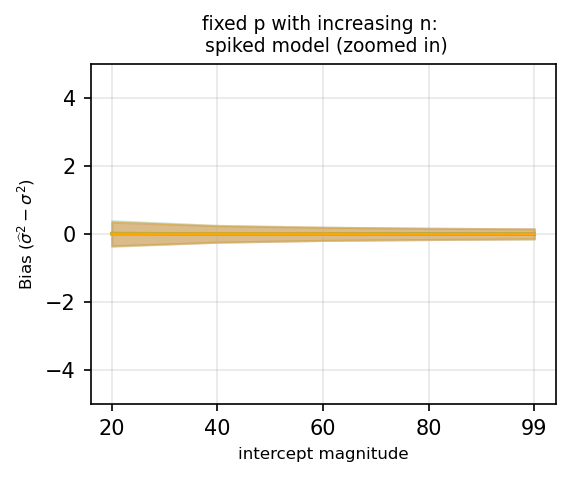

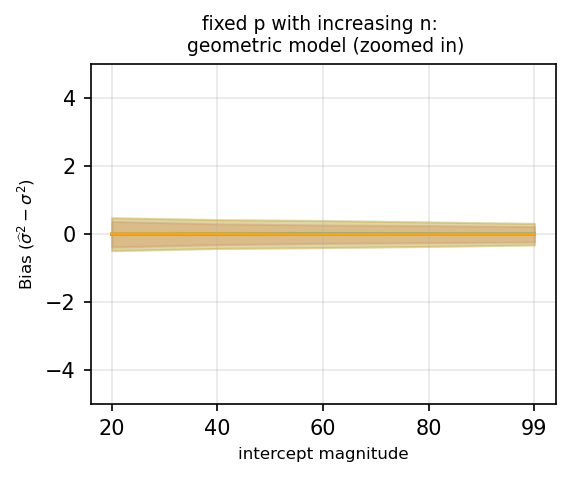

In [10]:
for covar_type in covar_type_list:
    data_files = []
    for ve_type in ve_types:
        file_path = os.path.join(basic_dir, experi_type, f'vedf_{experi_type}_{ve_type}_{covar_type}.csv')
        data_files.append(pd.read_csv(file_path))

    # Unpack the data if needed
    data1, data2, data3, data4 = data_files #
    draw_plot(bound, xlabel,noise_var_list)